# 유방암 결과 분류 모델

In [1]:
# 데이터 구성
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#데이터 분할 : train, test
from sklearn.model_selection import train_test_split

# 회귀 분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Scaler
from sklearn.preprocessing import MinMaxScaler

# 데이터 전처리
from sklearn import preprocessing

# 트리 시각화
from sklearn.tree import export_graphviz
import graphviz

# confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
import os
os.environ['PATH'] += os.pathsep + '/usr/lib/x86_64-linux-gnu/graphviz'

In [3]:
df_raw = pd.read_csv('Data/유방암.csv', encoding = 'cp949')

In [4]:
# 결측치 확인 - 없음
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

# 탐색적 분석

/home/piai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/piai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/piai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/piai/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa961259550>,
      dtype=object)

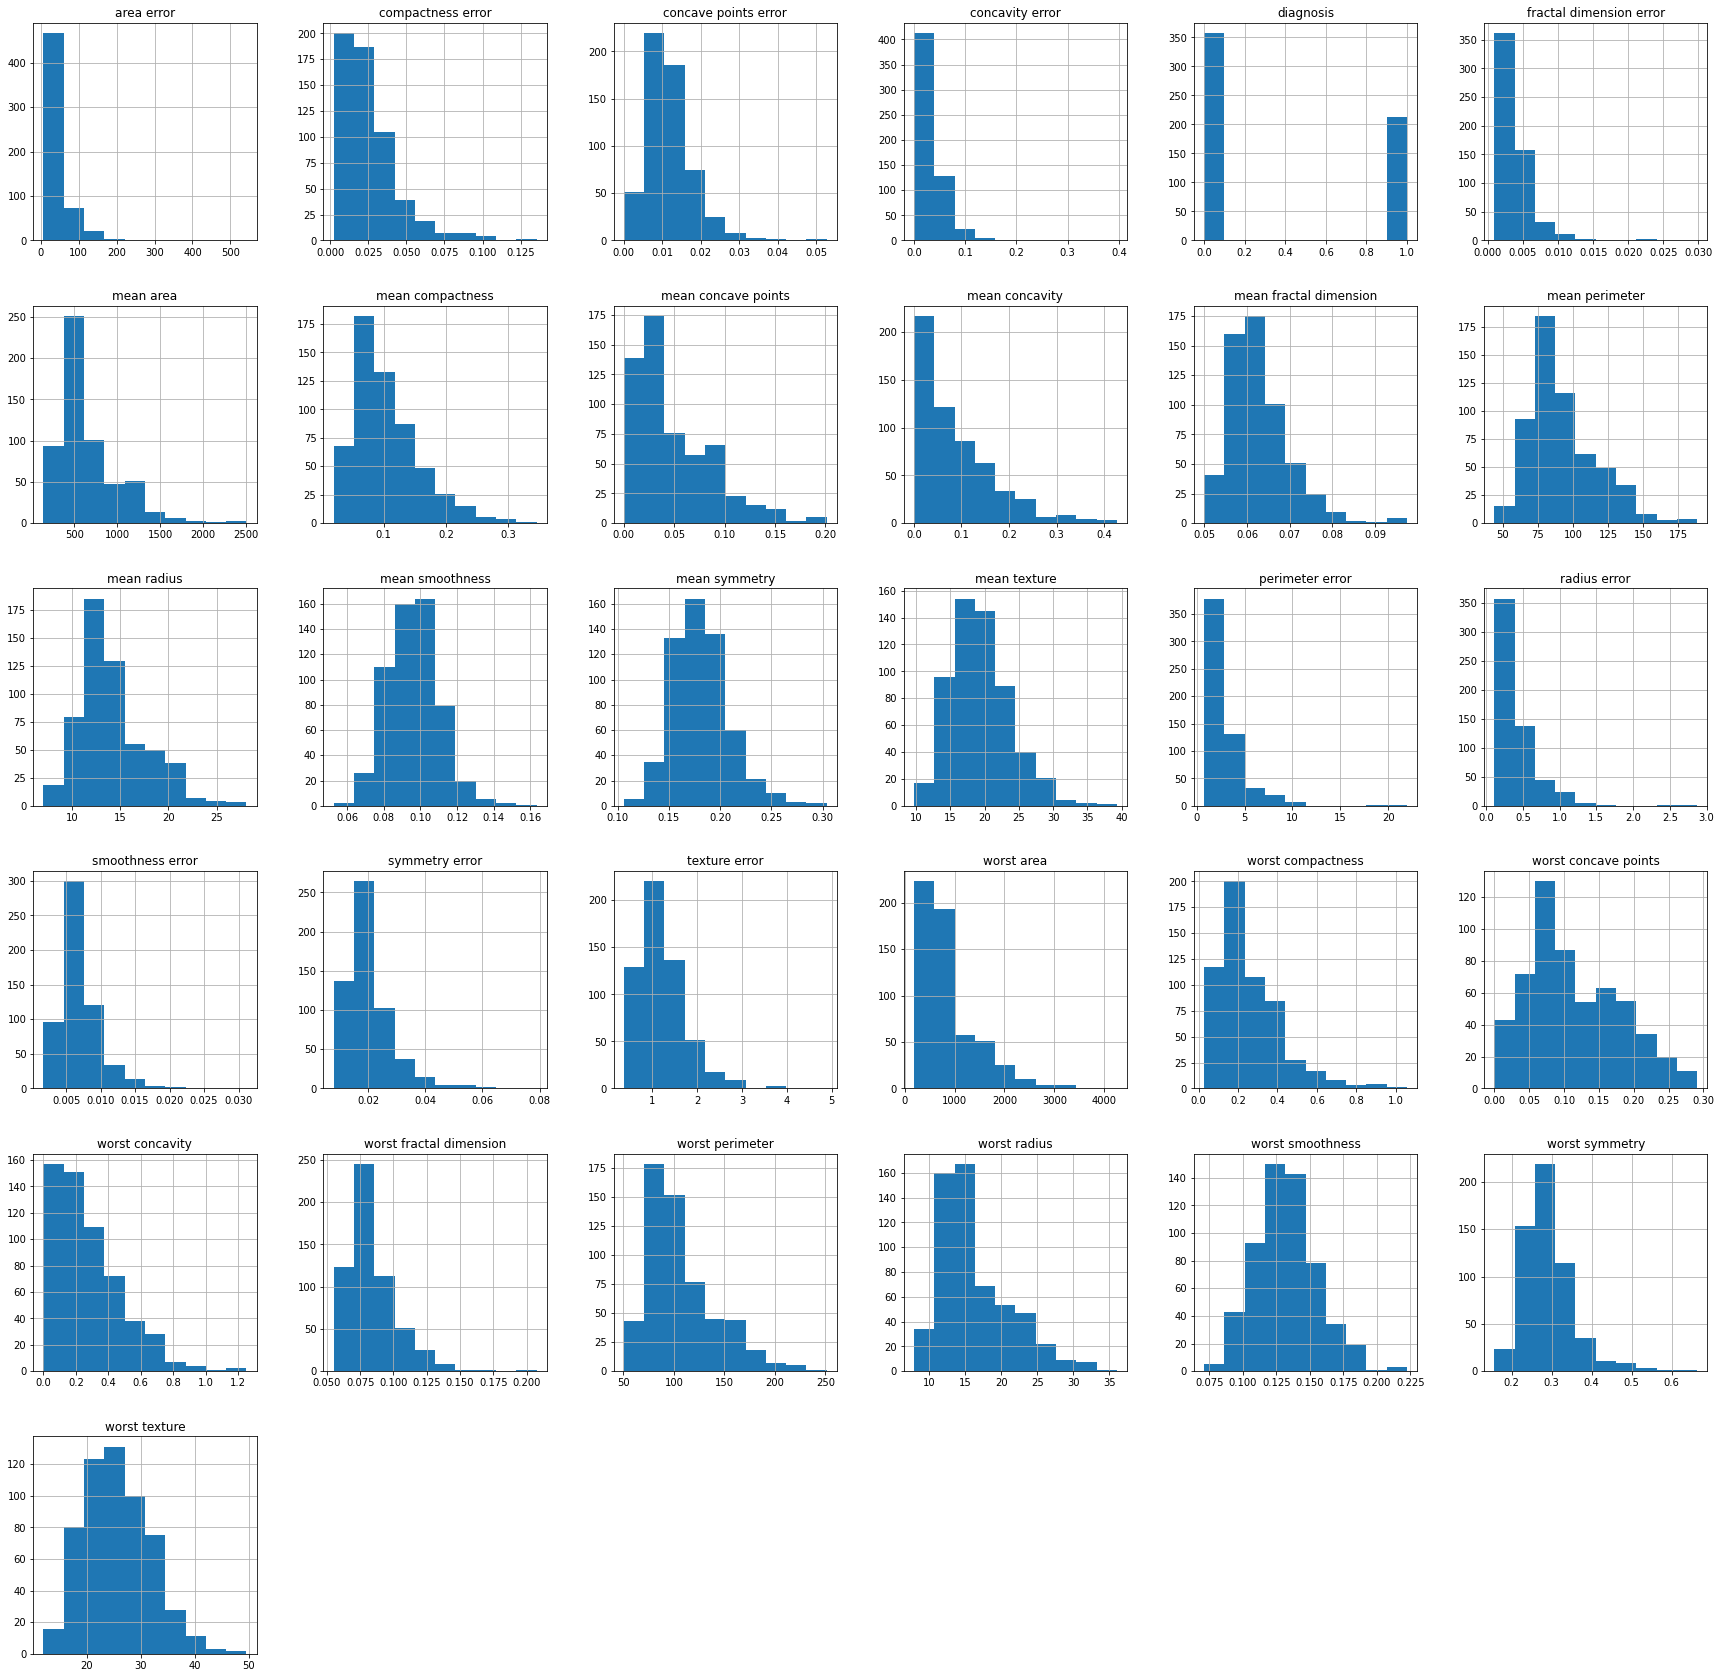

In [5]:
# 변수 별 히스토그램  
df_raw.hist(figsize=(30,30))

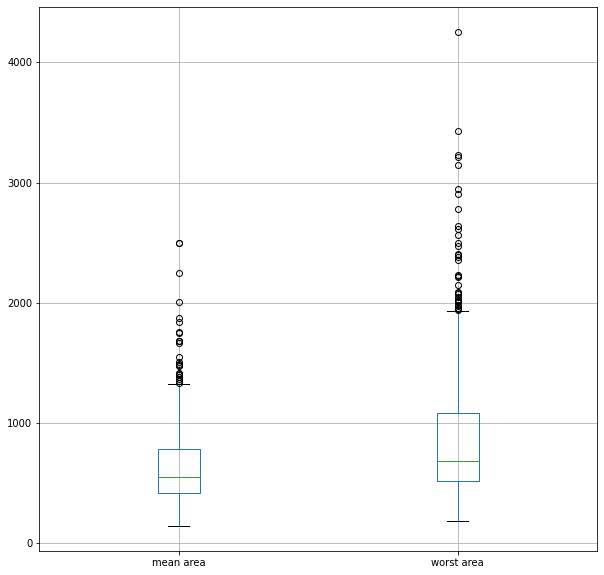

In [6]:
# 이상치 확인
df_raw.boxplot(column = ['mean area','worst area'], figsize = (10, 10))

이 모든 이상치 값을 다 버리게 된다면 데이터의 손실이 커지므로, 범주형으로 만드는 방법을 취하겠습니다.

변수 구간화를 통한 이상치 완화에 대한 근거는 https://m.blog.naver.com/gksshdk8003/221517070898 을 참고하였습니다.

# 데이터 전처리

In [7]:
df_raw

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df_raw['mean area(C)'] = 0

df_raw['worst area(C)'] = 0

In [9]:
df_raw.loc[(0<=df_raw['mean area']) & (df_raw['mean area']<=1000),'mean area(C)'] = 1
df_raw.loc[(1000<=df_raw['mean area']) & (df_raw['mean area']<=2000),'mean area(C)'] = 2

# C 구간은 데이터가 2개 뿐이므로 제거
#df_raw.loc[(2000<=df_raw['mean area']) & (df_raw['mean area']<=3000),'mean area(C)'] = 2

df_raw.loc[(0<=df_raw['worst area']) & (df_raw['worst area']<=1000),'worst area(C)'] = 1
df_raw.loc[(1000<=df_raw['worst area']) & (df_raw['worst area']<=2000),'worst area(C)'] = 2
df_raw.loc[(2000<=df_raw['worst area']) & (df_raw['worst area']<=3000),'worst area(C)'] = 3

# D 구간은 데이터가 소량이므로 제거
#df_raw.loc[(3000<=df_raw['worst area']) & (df_raw['worst area']<=4000),'worst area(C)'] = 4

In [10]:
# C 구간 결측치 제거
df_raw = df_raw[df_raw['mean area(C)'] != '']

# D 구간 결측치 제거
df_raw = df_raw[df_raw['worst area(C)'] != '']

/home/piai/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
pd.value_counts(df_raw['mean area(C)'].values)

1    477
2     88
0      4
dtype: int64

In [12]:
pd.value_counts(df_raw['worst area(C)'].values)

1    416
2    123
3     25
0      5
dtype: int64

In [13]:
# 목표 변수 데이터 지정
df_raw_y = df_raw['diagnosis']

In [14]:
df_raw_y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [15]:
# 설명 변수 데이터 지정
df_raw_x = df_raw.drop(['diagnosis', 'mean area','worst area'], axis = 1, inplace = False)

In [16]:
df_raw_x

,mean radius,mean texture,mean perimeter,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst texture,worst perimeter,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,mean area(C),worst area(C)
0,17.99,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2,3
1,20.57,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2,2
2,19.69,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,2,2
3,11.42,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1,1
4,20.29,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,26.40,166.10,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2,3
565,20.13,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,38.25,155.00,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,2,2
566,16.60,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,34.12,126.70,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,2
567,20.60,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,39.42,184.60,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,2,2


In [17]:
#  train(0.4) : validation(0.3) : test(0.3)으로 데이터 분할

df_tt_x, df_test_x, df_tt_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_tt_x, df_tt_y, test_size = 0.42857, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


# 의사 결정 나무 (Decision Tree)

In [18]:
# Naive한 모델 fitting

tree_uncustomized = DecisionTreeClassifier(random_state = 4321)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4321, splitter='best')

In [19]:
# train 데이터 정확도
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print('Accuracy on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set: 0.901


In [20]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))

In [21]:
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [22]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.930,0.901
1,2,0.947,0.906
2,3,0.991,0.918
3,4,0.996,0.936
4,5,1.000,0.918
5,6,1.000,0.918
6,7,1.000,0.918
7,8,1.000,0.918
8,9,1.000,0.918
9,10,1.000,0.918


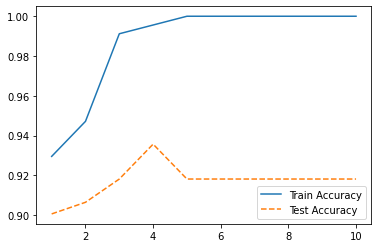

In [23]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

오버피팅이 시작되는 4 지점을 파라미터로 선택합니다

In [25]:
# 변수명 저장
v_feature_name = df_train_x.columns

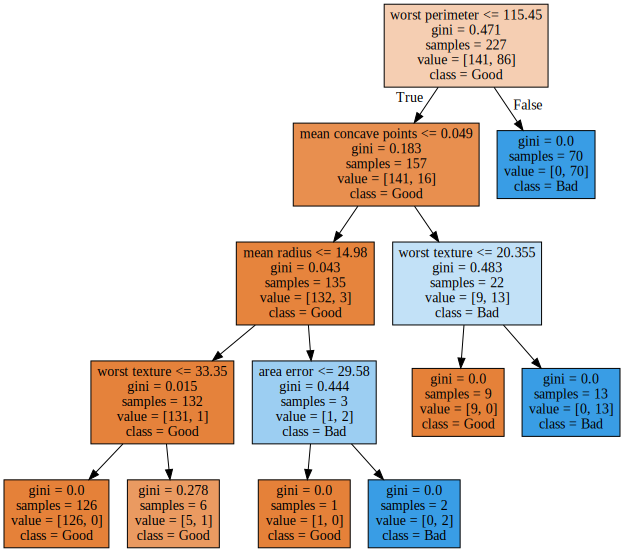

In [26]:
# 깊이가 4인 모델 시각화
tree_low = DecisionTreeClassifier(max_depth=4,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = 'tree_low.dot',class_names = ['Good', 'Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [27]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

para_split = [n_split*10 for n_split in range (1,11)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))

In [28]:
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [29]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.991,0.918
1,20,0.991,0.918
2,30,0.952,0.889
3,40,0.952,0.889
4,50,0.952,0.889
5,60,0.952,0.889
6,70,0.952,0.889
7,80,0.952,0.889
8,90,0.952,0.889
9,100,0.952,0.889


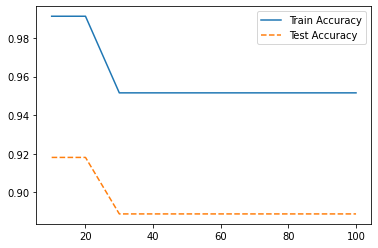

In [30]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

Train, Test 정확도 값이 가장 높게 나오는 5를 파라미터로 선택합니다.

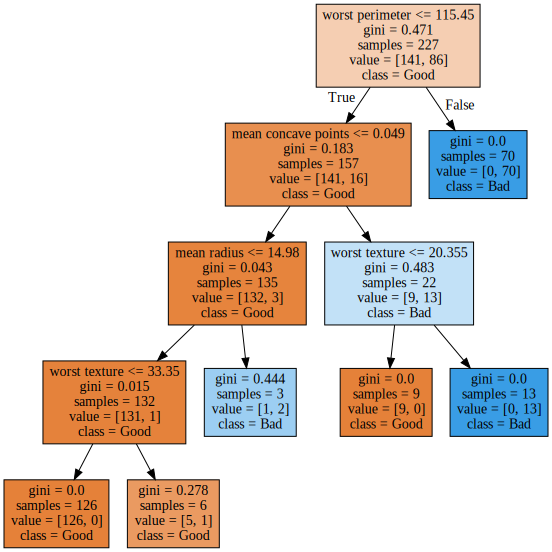

In [31]:
# 분리 노드의 최소 자료 수가 5인 모델 시각화

tree_low = DecisionTreeClassifier(max_depth=4,min_samples_split=5, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = 'tree_low.dot',class_names = ['Good', 'Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [32]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf*2 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf, min_samples_split=5, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))

In [33]:
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [34]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.991,0.918
1,4,0.987,0.936
2,6,0.987,0.936
3,8,0.987,0.936
4,10,0.982,0.936
5,12,0.947,0.906
6,14,0.947,0.906
7,16,0.947,0.906
8,18,0.947,0.906
9,20,0.947,0.906


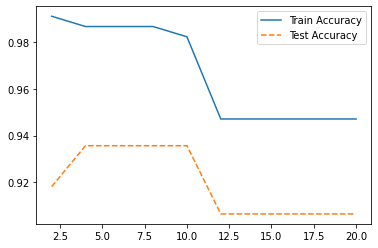

In [35]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

Train, Test 데이터의 성능 변화를 고려하여 파라미터로 6 선택합니다.

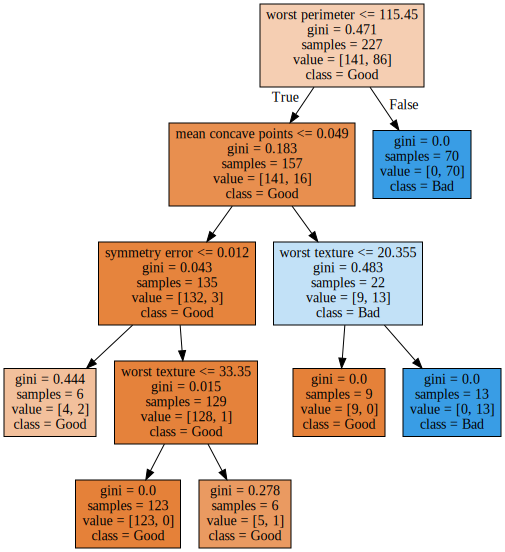

In [36]:
# 잎사귀 노드의 최소 자료 수가 6인 모델 시각화

tree_low = DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5, max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = 'tree_low.dot',class_names = ['Good', 'Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [37]:
# 최종 모델 선정

tree_final = DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5, max_depth = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

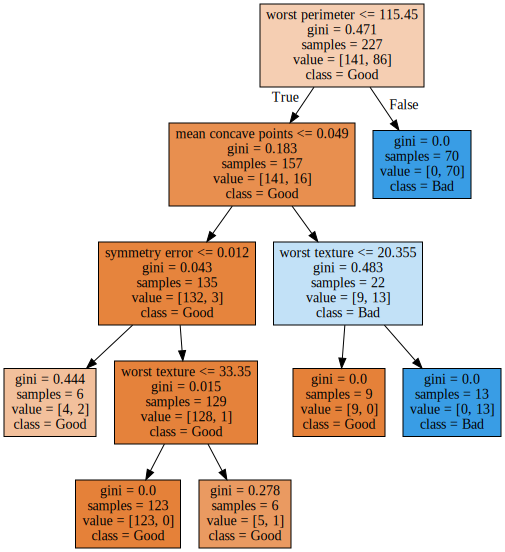

In [38]:
# 최종 모델 시각화
export_graphviz(tree_final, out_file = 'tree_final.dot',class_names = ['Good', 'Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [39]:
# 모델 평가
y_pred = tree_final.predict(df_test_x)
# train 데이터 정확도
print('Accuracy on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print('Accuracy on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
# confusion matrix
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.987
Accuracy on test set: 0.906
Confusion matrix: 
[[102  11]
 [  5  53]]


In [40]:
# 설명 변수의 중요도
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

In [41]:
# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
21,worst perimeter,0.762
6,mean concave points,0.119
20,worst texture,0.107
17,symmetry error,0.012
0,mean radius,0.000
16,concave points error,0.000
28,mean area(C),0.000
27,worst fractal dimension,0.000
26,worst symmetry,0.000
25,worst concave points,0.000


Text(0, 0.5, 'Feature')

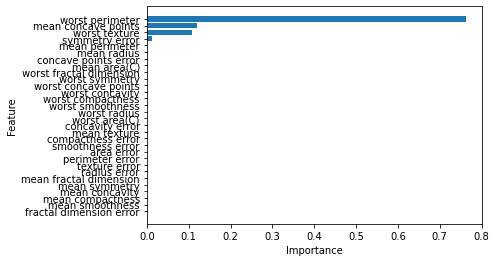

In [42]:
# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])

plt.xlabel('Importance')
plt.ylabel('Feature')

# 랜덤 포레스트 (Random Forest)

In [43]:
# Naive한 랜덤 포레스트 모델 생성 : RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.947


In [44]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

para_n_tree = [n_tree*10 for n_tree in range (1,16)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_val_x, df_val_y))

In [45]:
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [46]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.971
1,20,1.000,0.971
2,30,1.000,0.965
3,40,1.000,0.977
4,50,1.000,0.977
5,60,1.000,0.959
6,70,1.000,0.965
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.959


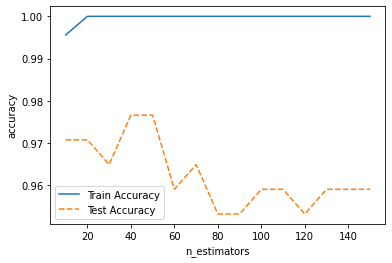

In [47]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

그래프를 보면 train 데이터의 성능 변화가 전혀 없다는 것을 확인할 수 있습니다.  
Overfitting이 심하게 되었기 때문에 train 데이터의 정확도가 100%입니다.  
Test 데이터의 성능 변화를 고려하여 40을 선택할 수 있겠네요  

In [48]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range (1,151) :
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 4321)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do no

Text(0.5, 0, 'n_estimators')

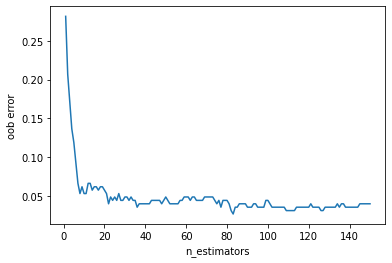

In [49]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [50]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_val_x, df_val_y))

In [51]:
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [52]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.930,0.895
1,2,0.974,0.947
2,3,0.982,0.953
3,4,0.996,0.947
4,5,0.996,0.965
5,6,1.000,0.977
6,7,1.000,0.977
7,8,1.000,0.977
8,9,1.000,0.977
9,10,1.000,0.977


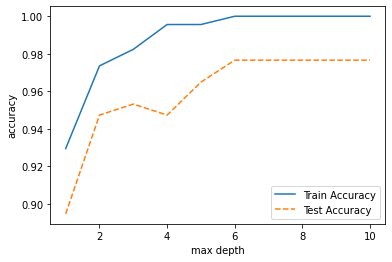

In [53]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

Overfitting이 나기 바로 직전인 5 지점에서 Train과 Test의 정확도가 최대라는 것을 알 수 있습니다. 따라서 5를 파라미터로 선택합니다.

In [54]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

para_split = [n_split * 5 for n_split in range (1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 5,
                               n_estimators = 40, random_state=4321)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_val_x, df_val_y))

In [55]:
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [56]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,5,0.996,0.965
1,10,0.996,0.959
2,15,0.987,0.959
3,20,0.987,0.959
4,25,0.982,0.959
5,30,0.987,0.959
6,35,0.987,0.959
7,40,0.982,0.959
8,45,0.982,0.959
9,50,0.974,0.959


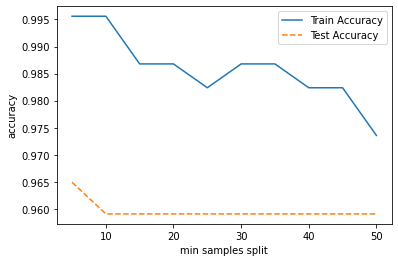

In [57]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.legend()

그래프를 보아 Train, Test 정확도가 가장 높은 3을 파라미터로 채택합니다.

In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 10 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 5,
                                min_samples_split=3, n_estimators = 40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_val_x, df_val_y))

In [59]:
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [60]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.978,0.942
1,20,0.952,0.924
2,30,0.947,0.918
3,40,0.938,0.924
4,50,0.943,0.924
5,60,0.921,0.901
6,70,0.894,0.912
7,80,0.621,0.602
8,90,0.621,0.602
9,100,0.621,0.602


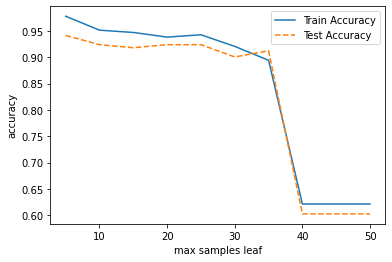

In [61]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.xlabel('max samples leaf')
plt.ylabel('accuracy')
plt.legend()

오호, 참 신기한 광경이로군요!  
36 구간을 보면 Test 정확도가 Train 정확도보다 더 높게 나오는 것을 확인 할 수 있습니다.  
제 생각은 선택된 Test 셋이 모델이 학습한 정보보다 더 작은 정보로도 맞출 수 있는 문제라서 그런 것 같습니다.  
Train, Test의 정확도 변화를 고려해서 5를 파라미터로 선택해 봅니다!

In [62]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 5, max_depth = 5,
                                min_samples_split=3, n_estimators = 40, random_state=1234)
rf_final.fit(df_train_x,df_train_y)    

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [63]:
# 평가
y_pred = rf_final.predict(df_test_x)

In [64]:
# train 데이터 정확도
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print('Accuracy on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
# Confusion matrix
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.987
Accuracy on test set: 0.947
Confusion matrix: 
[[108   5]
 [  4  54]]


In [65]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

Text(0, 0.5, 'Feature')

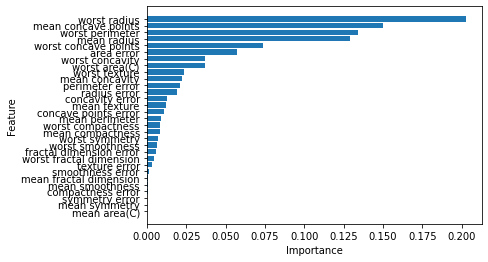

In [66]:
# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])

plt.xlabel('Importance')
plt.ylabel('Feature')

# 결론

모델의 정확도로는 같은 테스트 데이터 셋에 대해 Decision Tree, Random Forest가 각각 90.6%, 94.7%의 정확도를 보였다.